## Project - World Happiness Report



### Data Set Information:


Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

Inspiration

What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? Did any country experience a significant increase or decrease in happiness?

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average 2014-2016 life evaluations. These residuals have an average value of approximately zero over the whole set of countries. Figure 2.2 shows the average residual for each country when the equation in Table 2.1 is applied to average 2014- 2016 data for the six variables in that country. We combine these residuals with the estimate for life evaluations in Dystopia so that the combined bar will always have positive values. As can be seen in Figure 2.2, although some life evaluation residuals are quite large, occasionally exceeding one point on the scale from 0 to 10, they are always much smaller than the calculated value in Dystopia, where the average life is rated at 1.85 on the 0 to 10 scale.

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. 
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Renaming & calling the dataset happiness_score_dataset as df.

In [2]:
Happiness_data=pd.read_csv('happiness_score_dataset.csv')
Happiness_data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df=Happiness_data.drop('Happiness Rank',axis=1)
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Checking the data shape

In [4]:
df.shape

(158, 11)

### Obtaining the column names inolved in our dataset.

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

### Checking the data-types under the respective columns.

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

### Checking if there are any null values in our dataset.



In [7]:
df.isnull()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False


Observation :-

There are no rows/columns with null values.

### Adding the total number of null values , if there's any.

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no null values present in the dataset.

### Visual Representation of Null-Values

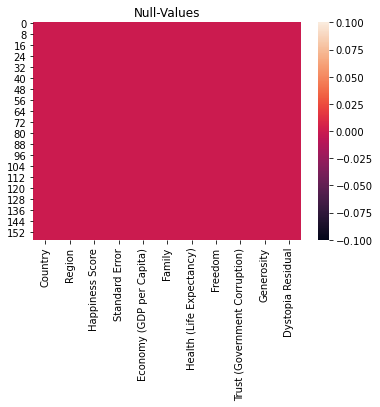

In [9]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

Observation :-

There are no null values.


### Checking the not null values in our dataset.

In [10]:
df.notnull()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
153,True,True,True,True,True,True,True,True,True,True,True
154,True,True,True,True,True,True,True,True,True,True,True
155,True,True,True,True,True,True,True,True,True,True,True
156,True,True,True,True,True,True,True,True,True,True,True


Observation :-

There is no column/row or entity with null value.

### Checking the total number of values in our dataset , if it is not null. 

In [11]:
df.notnull().sum()

Country                          158
Region                           158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

Observation :-

These are the total values placed in the respective columns.
For example :- column -"Region" is having 158 numbers of total values listed in it under the dataset.

- The dataset is uniformly distributed i.e all the rows and columns have equal number of values.

### Obtaining the mean ,median and mode values of all the columns respectively.

In [12]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Regression Identication

- The target variable in our dataset is the 'Happiness Score' , which ia a continous varible so it is classified as linear regression problem.

### Transforming the string data-type columns from the dataset with Label-Encoding.

In [13]:
le=preprocessing.LabelEncoder()
df["Country"]=le.fit_transform(df["Country"])
df['Region']=le.fit_transform(df['Region'])
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Visual Representation of the data

### Graph for the target variable 'Happiness Score' of the dataset - Univariate Analysis

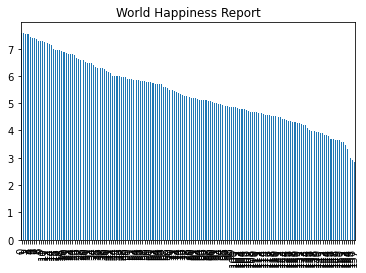

In [14]:
df['Happiness Score'].plot.bar()
plt.title('World Happiness Report')
plt.show()

- On the basis of 'Happiness Score' the countries have been ranked from top to bottom,higher the score higher is the rank.

### Graphical representation of all the attributes of the dataset


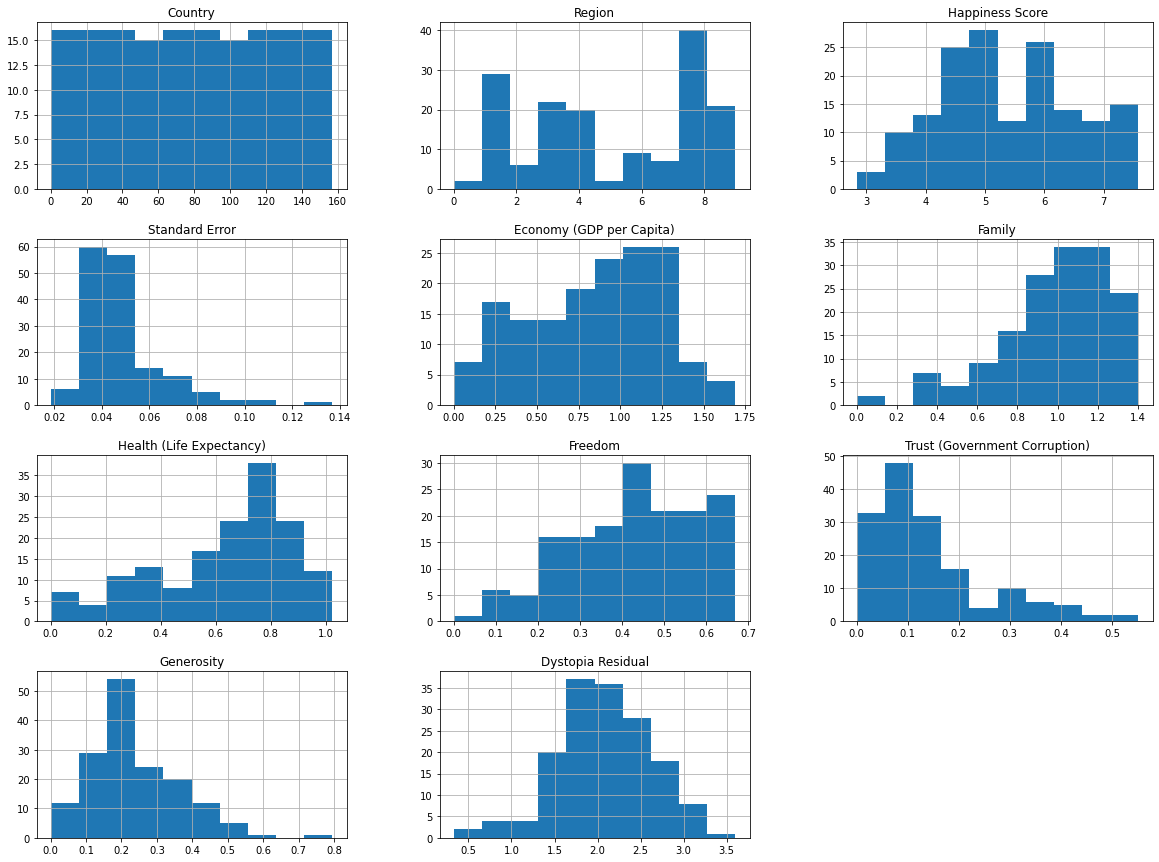

In [15]:
fig = plt.figure(figsize=(20,15)) # univariate analysis on all the attributes of the dataset
ax = fig.gca() 
df.hist(ax=ax)
plt.show()

## Bivariate Analysis 

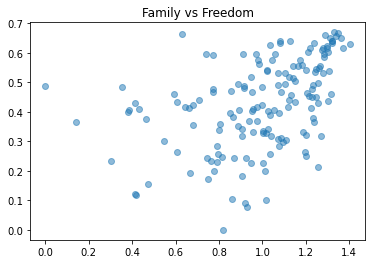

In [16]:
plt.scatter(df['Family'],df['Freedom'],alpha=0.5) # analysis with 2 variables i.e 2 attributes of the dataset
plt.title('Family vs Freedom')
plt.show()

-The graph indicates that there is a positive relation between the 2 variable 'Family' & 'Freedom'.

## Observing Correlation - Multivariate Analysis

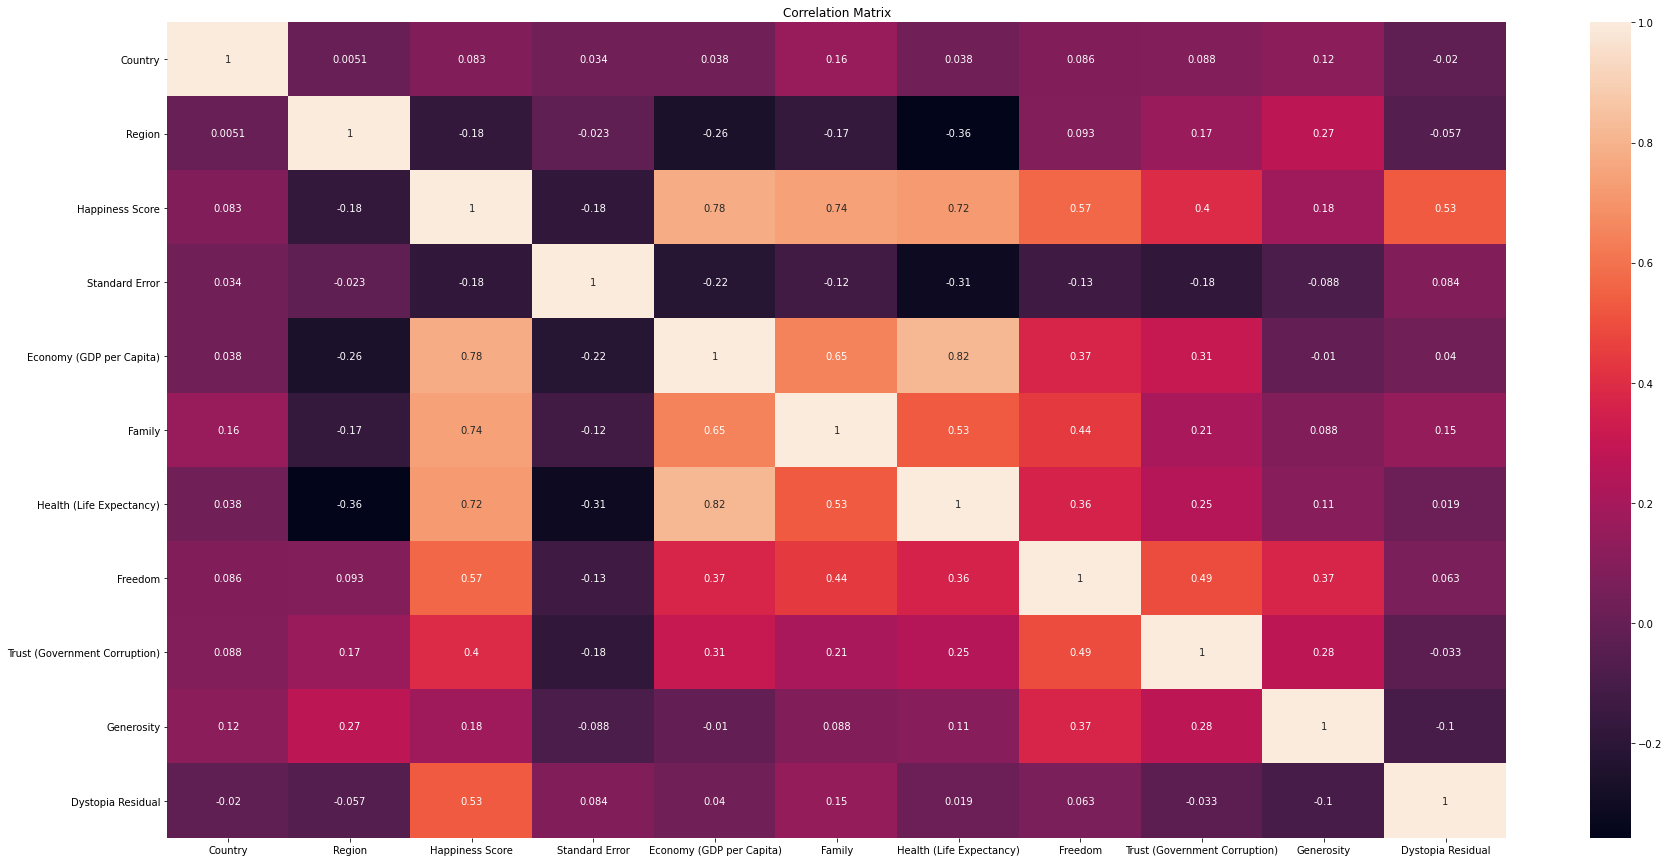

In [17]:
corr_mat=df.corr()

plt.figure(figsize=[30,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

The graph indicates the correlation between the attributes which affect the Happiness Score of the countries.
- The darker the shade lower is the correlation between the variables.
- The bright shades has comparatively high and positive correlation with the variables.
- The dark shades represent negative corelation ,if value of one variable increses then the value of other variable decreases or vice-versa.

Let's find the correlation value to see positively and negatively correlated variables.

### Correlation value of the attributes

In [18]:
corr_matrix=df.corr()
corr_matrix['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

- The variables 'Region' & 'Standard Error' are negatively correlated variables which the growth and declining of Happiness Score which affects thier ranks.

##  Splitting the target variable from the independent variables.



In [19]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [20]:
# Checking the skewness in the dataset
x.skew()

Country                          0.000000
Region                          -0.116119
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [21]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.head()

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.171069,1.244530,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,-0.344327,1.244530,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,-0.845092,1.244530,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,0.620972,1.244530,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,-1.195601,0.030337,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118


In [55]:
# Checking the skewness in the dataset
x.skew()

Country                          0.000000
Region                          -0.116119
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

- The negative skewness indicates longer or flattened tail at the left side.
- The positive skewness indicates lond=ger or falltter tail at the right side.

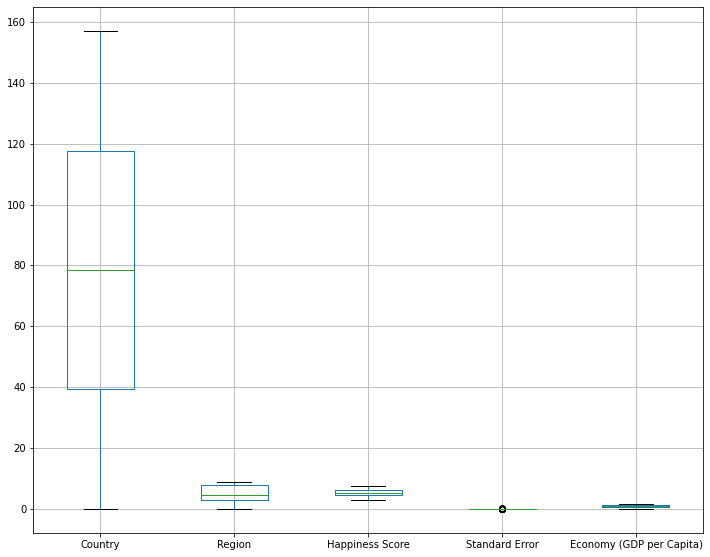

In [23]:
# Plotting boxplots for first 5 columns
df.iloc[:,0:5].boxplot(figsize=(12,10))
plt.subplots_adjust(bottom=0.15)
plt.show()

- Outliers are present in the 'Standard Error' variable.

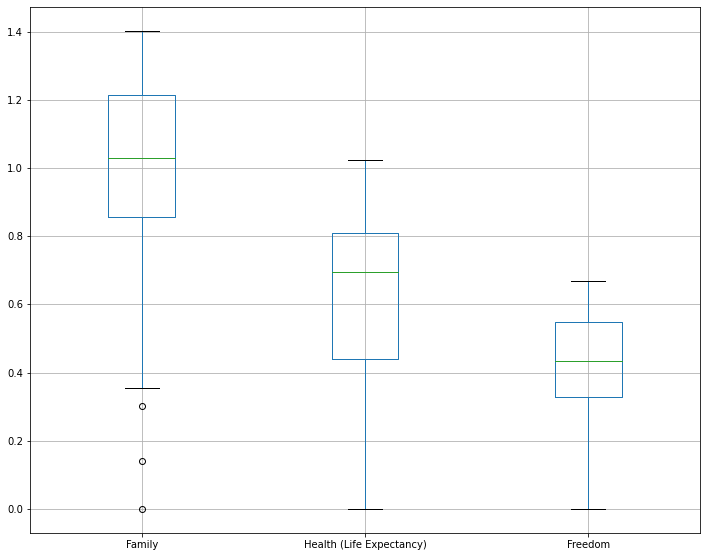

In [24]:
# Plotting boxplots for first 5 columns
df.iloc[:,5:8].boxplot(figsize=(12,10))
plt.subplots_adjust(bottom=0.15)
plt.show()

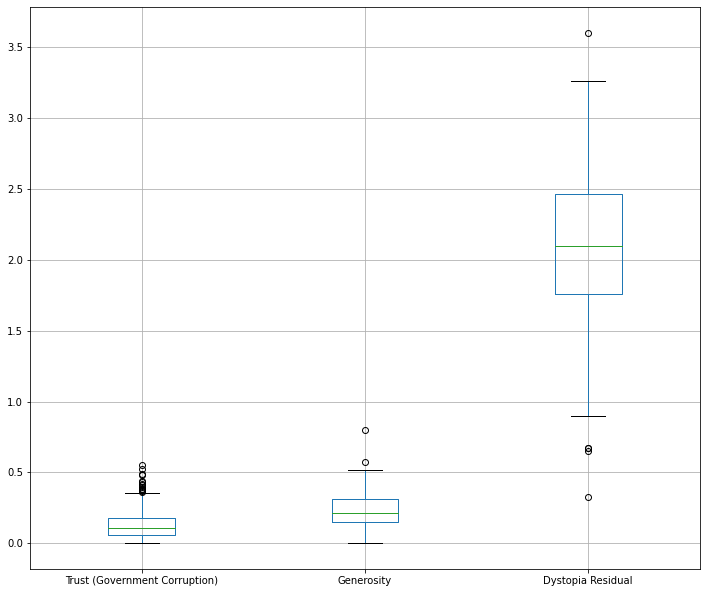

In [25]:
df.iloc[:,8:12].boxplot(figsize=(12,10))
plt.subplots_adjust(bottom=0.10)
plt.show()

- Outliers are present in the 'Generosity' and 'Dystopia Residual' variables.

## Removing Outliers

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.23877001, 1.30025593, 1.93736005, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.91458063, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.88479215, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 2.0761992 , ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 2.1646885 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 2.22251319, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [27]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157]), array([ 8,  3,  3,  3,  9,  5,  8, 10,  5]))


In [28]:
df_new=df[(z<3).all(axis=1)]
df_new

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [29]:
df=df_new

The target variable 'Happiness Score' is a contionous variable , so we use the Linear Regression method for the machine learning.
- Splitting the traget variable from the dataset as x and y.

In [30]:
x.head()

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [31]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [32]:
x.shape

(158, 10)

In [33]:
y.shape

(158,)

## Training and testing different models

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [35]:
x_train.shape

(105, 10)

In [36]:
y_train.shape

(105,)

In [37]:
x_test.shape

(53, 10)

In [38]:
y_test.shape

(53,)

## Testing - Linear Regression model

In [39]:
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [40]:
ln.coef_

array([-4.53046909e-07, -1.99392422e-05, -9.14591714e-04,  1.00015143e+00,
        9.99964803e-01,  9.99827254e-01,  9.99893392e-01,  9.99969046e-01,
        1.00008340e+00,  9.99994286e-01])

In [41]:
ln.intercept_

0.00021463582909397871

In [42]:
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [43]:
ln.score(x_train,y_train)

0.9999999436871095

In [44]:
# predict the value
prediction=ln.predict(x_test)
print('Predicted Happiness  :',prediction)

Predicted Happiness  : [4.30697947 5.98714899 4.19428701 2.90444564 5.05714884 6.5740932
 4.89741047 4.8760126  4.94875026 3.93072816 6.90137929 5.82829601
 6.98260998 5.54822287 6.78624522 6.50515375 4.5070889  4.68560781
 4.97097012 5.69521826 3.6550485  6.93732023 7.19980151 7.28417243
 6.48513707 5.19231214 5.88900999 3.95555599 4.36909255 3.6807654
 3.78071169 5.33244436 3.99472214 5.83268114 4.35005589 5.1287532
 3.34003339 6.12282113 5.60464172 4.55039163 6.6697108  4.03295177
 5.25285703 3.65587536 6.30237577 5.2864097  6.81016319 4.21859578
 3.90368007 7.22575395 5.21206233 5.58864987 4.43547983]


In [45]:
print('actual score',y_test)

actual score 128    4.307
45     5.987
134    4.194
156    2.905
90     5.057
29     6.574
96     4.898
98     4.876
95     4.949
140    3.931
19     6.901
56     5.828
15     6.983
69     5.548
24     6.786
30     6.505
122    4.507
109    4.686
93     4.971
65     5.695
150    3.655
18     6.937
12     7.200
9      7.284
31     6.485
81     5.192
51     5.889
139    3.956
125    4.369
146    3.681
145    3.781
75     5.332
137    3.995
55     5.833
126    4.350
84     5.129
154    3.340
42     6.123
67     5.605
117    4.550
26     6.670
136    4.033
78     5.253
149    3.656
36     6.302
76     5.286
22     6.810
133    4.218
141    3.904
11     7.226
79     5.212
68     5.589
123    4.436
Name: Happiness Score, dtype: float64


In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('error :')

print('Mean absolute error :',mean_absolute_error(y_test,prediction))
print('Mean squared error :',mean_squared_error(y_test,prediction))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,prediction)))
print('r2_score value :',r2_score(y_test,prediction))

error :
Mean absolute error : 0.0002453842676520551
Mean squared error : 8.332764664594419e-08
Root Mean Squared Error :  0.0002886652847952871
r2_score value : 0.9999999372659655


## Testing - Linear Regression with Lasso and Ridge models

In [47]:
from sklearn.linear_model import Lasso,Ridge

In [48]:
ls=Lasso(alpha=0.0001)
# ls=lasso(alpha=0.1) --> default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9999989909075895

In [49]:
Rg=Ridge(alpha=.001)
Rg.fit(x_train,y_train)
Rg.score(x_train,y_train)

0.999999934640696

# Cross Validation Score for each model

In [50]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ln,x,y,cv=5)
print('The cross validation score for the Linear Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :1.71.')

The cross validation score for the Linear Regression model is : 0.9999982233020892
The difference between accuracy and crossvalidation score is :1.71.


In [51]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ls,x,y,cv=5)
print('The cross validation score for the Lasso Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :7.65.')

The cross validation score for the Lasso Regression model is : 0.9999224310122035
The difference between accuracy and crossvalidation score is :7.65.


In [52]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(Rg,x,y,cv=5)
print('The cross validation score for the Ridge Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :2.18.')

The cross validation score for the Ridge Regression model is : 0.9999977467033891
The difference between accuracy and crossvalidation score is :2.18.


- The minimum difference between the accuracy score and cross validatio score is for the Linear Regression model (1.71) so this is our best model.

## Saving the model

In [53]:
import pickle

filename='picklelnfile.pkl'
pickle.dump(ln,open('picklelnfile','wb'))

In [54]:
saved_model=pickle.load(open('picklelnfile','rb'))
saved_model.predict(x_test)

array([4.30697947, 5.98714899, 4.19428701, 2.90444564, 5.05714884,
       6.5740932 , 4.89741047, 4.8760126 , 4.94875026, 3.93072816,
       6.90137929, 5.82829601, 6.98260998, 5.54822287, 6.78624522,
       6.50515375, 4.5070889 , 4.68560781, 4.97097012, 5.69521826,
       3.6550485 , 6.93732023, 7.19980151, 7.28417243, 6.48513707,
       5.19231214, 5.88900999, 3.95555599, 4.36909255, 3.6807654 ,
       3.78071169, 5.33244436, 3.99472214, 5.83268114, 4.35005589,
       5.1287532 , 3.34003339, 6.12282113, 5.60464172, 4.55039163,
       6.6697108 , 4.03295177, 5.25285703, 3.65587536, 6.30237577,
       5.2864097 , 6.81016319, 4.21859578, 3.90368007, 7.22575395,
       5.21206233, 5.58864987, 4.43547983])